<a href="https://colab.research.google.com/github/LondheShubham153/deep_learning/blob/main/Fashion_mnist_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils

from keras.callbacks import ModelCheckpoint
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
print(y_test[0:5])

[9 2 1 1 6]


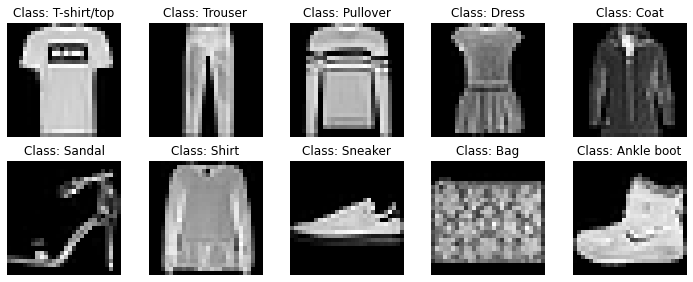

In [ ]:
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

fig = plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[y_train == i][0]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_labels_dict[i]))
    plt.axis('off')
    
plt.tight_layout()

In [ ]:
print(y_train.shape)
print('First 2 examples are : ', y_train[0:2])

(60000,)
First 2 examples are :  [9 0]


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
print(y_train.shape)
print('First 2 examples now are:', y_train[0:2])

(60000, 10)
First 2 examples now are: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
#Initialize Sequential Model
model = tf.keras.models.Sequential()

#Reshape Data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the Data
model.add((tf.keras.layers.BatchNormalization()))

#Add Hidden Layer with Zero Neurons
model.add(( tf.keras.layers.Dense(20, activation='relu')))

#Add Hidden layer with 10 Neurons
model.add(( tf.keras.layers.Dense(20, activation='relu')))

#Add Hidden Layer with 10 Neurons
model.add(( tf.keras.layers.Dense(20, activation='relu')))

#Add Dense Layer which provides 10 Outputs aftter applying Softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the Model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 784)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 20)                15700     
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                      

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7926 - accuracy: 0.7244 - val_loss: 0.5297 - val_accuracy: 0.8103
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4935 - accuracy: 0.8219 - val_loss: 0.4751 - val_accuracy: 0.8306
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4477 - accuracy: 0.8363 - val_loss: 0.4442 - val_accuracy: 0.8389
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4243 - accuracy: 0.8456 - val_loss: 0.4247 - val_accuracy: 0.8429
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4043 - accuracy: 0.8525 - val_loss: 0.4086 - val_accuracy: 0.8496
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3915 - accuracy: 0.8574 - val_loss: 0.4037 - val_accuracy: 0.8554
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3823 - accuracy: 0.8598 - val_loss: 0.3958 - val_accuracy:

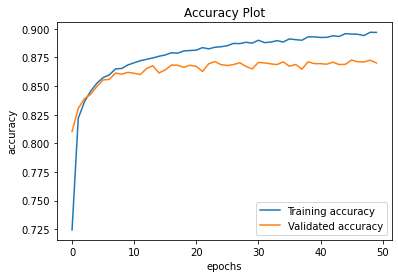

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validated accuracy')
plt.title('Accuracy Plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

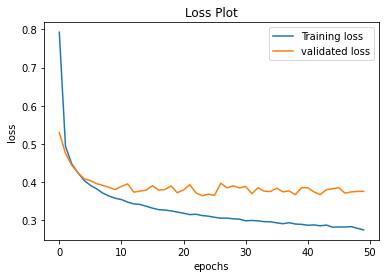

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='validated loss')
plt.title('Loss Plot')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

In [ ]:
Pre = np.argmax(y_pred)
print(Pre)
print(y_test[:10])

0
[9 2 1 1 6 1 4 6 5 7]


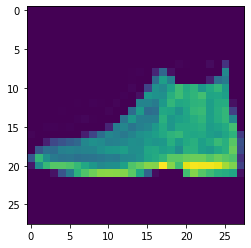

T-shirt/top


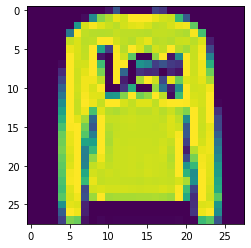

Trouser


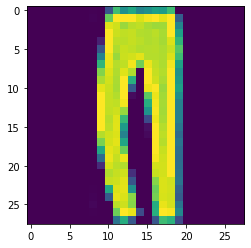

Pullover


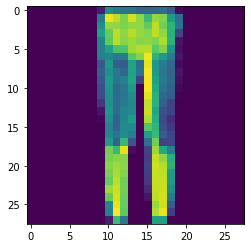

Dress


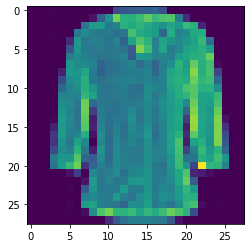

Coat


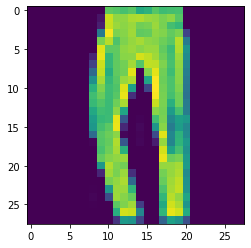

Sandal


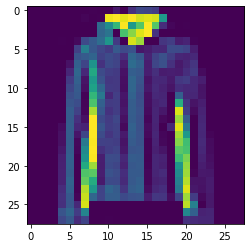

Shirt


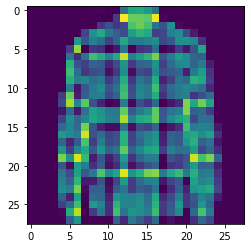

Sneaker


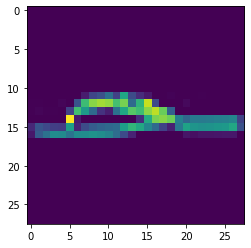

Bag


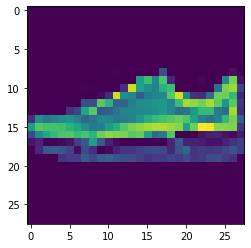

Ankle boot


In [ ]:
for j in range(10):
    plt.imshow(X_test[j])
    plt.show()
    print(class_labels_dict[j])

In [ ]:

# Check which items we got right / wrong
correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]

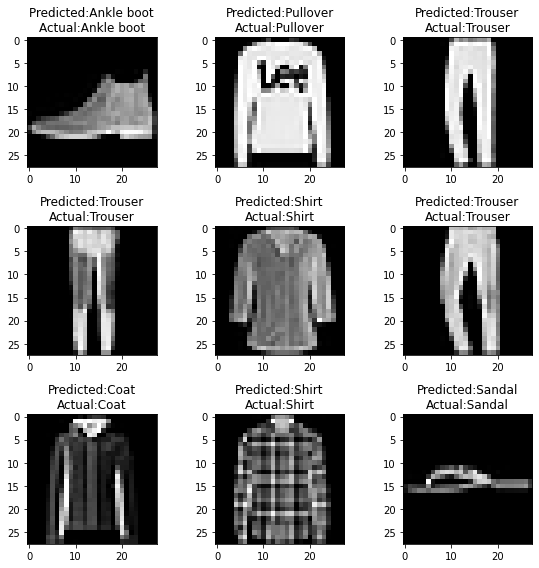

In [ ]:
plt.figure(figsize=(8,8))

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted:{}\nActual:{}".format(class_labels_dict[y_pred[correct]],class_labels_dict[y_test[correct]]))

plt.tight_layout()

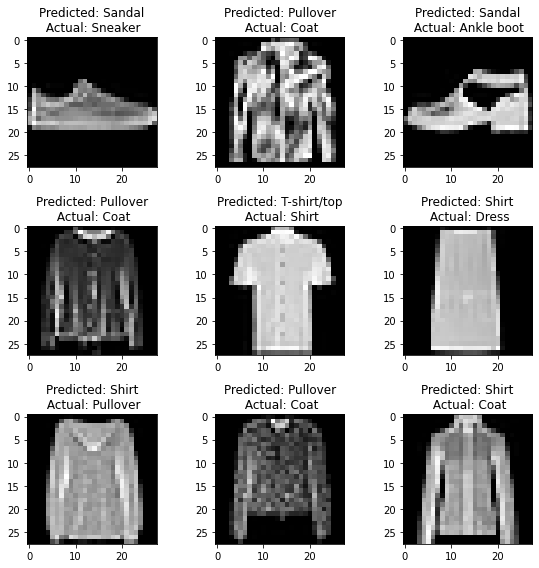

In [ ]:
plt.figure(figsize=(8,8))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}\n Actual: {}".format(class_labels_dict[y_pred[incorrect]], class_labels_dict[y_test[incorrect]]))
    
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = [class_labels_dict[x] for x in range(0,10)]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.83      0.82      1000
     Trouser       0.98      0.97      0.97      1000
    Pullover       0.74      0.84      0.79      1000
       Dress       0.89      0.85      0.87      1000
        Coat       0.79      0.80      0.80      1000
      Sandal       0.94      0.96      0.95      1000
       Shirt       0.70      0.62      0.66      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:

matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=target_names, columns=target_names)
matrix.index.name = 'Predicted'
matrix.columns.name = 'Actual'
matrix

Actual,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
Predicted,,,,,,,,,,
T-shirt/top,828,3,32,23,3,0,105,0,6,0
Trouser,4,967,3,20,3,0,2,0,1,0
Pullover,19,1,841,7,71,0,55,0,6,0
Dress,32,8,18,847,51,1,36,0,7,0
Coat,0,1,118,23,800,0,56,0,2,0
Sandal,0,0,0,1,0,961,0,17,4,17
Shirt,139,3,122,22,75,1,622,0,16,0
Sneaker,1,0,0,0,0,34,0,935,0,30
Bag,4,1,5,4,7,6,9,2,961,1
